<a href="https://colab.research.google.com/github/Supreme-YS/ML/blob/main/Sentence_CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 합성곱 신경망을 이용한 문장 분류(classification)
- 문장 I am a teacher 


In [14]:
from tensorflow.keras.models     import Sequential , Model
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Input, Dropout, Flatten, Conv1D, MaxPooling1D, Embedding, Reshape, concatenate, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPool2D
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model, to_categorical
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint

# RNN
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Ensemble 에 필요한 모듈
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score

# split 도구
from sklearn.model_selection     import train_test_split

# Scaler
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder

# load dataset
from sklearn.datasets            import load_breast_cancer
from tensorflow.keras.datasets   import boston_housing

# 교차검증 
from sklearn.model_selection     import KFold

# 시각화도구
import matplotlib.pyplot as plt

import seaborn as sns
import pandas  as pd
import numpy   as np

# dataset 
from tensorflow.keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
X_train = pad_sequences(X_train, maxlen = 300)
X_test = pad_sequences(X_test, maxlen = 300)

In [4]:
X_train.shape, X_test.shape

((25000, 300), (25000, 300))

In [10]:
# 1 - D Conv

def sentence_cnn_1d() :
    model = Sequential()

    model.add( Embedding(input_dim=3000 , output_dim=100 , input_length=300) )
    model.add( Conv1D(filters=50, kernel_size= 5, strides=1, padding = 'valid') )
    model.add( MaxPooling1D(2, padding='valid'))

    model.add( Flatten() )

    # classification
    model.add( Dense(10))
    model.add( Activation('relu'))

    # output
    model.add( Dense(1) )
    model.add( Activation('sigmoid'))

    # compile
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [11]:
model = sentence_cnn_1d()
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f2616060850>>

In [ ]:
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.3, epochs=10, verbose=1)

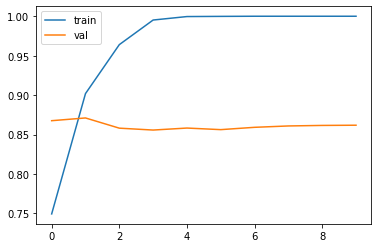

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [15]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

782/782 [==============================] - 3s 4ms/step - loss: 0.7053 - accuracy: 0.8641
Test accuracy : 0.864080011844635


In [25]:
# 2 - D Conv

def sentence_cnn_2d() :
    model = Sequential()

    model.add( Embedding(input_dim=3000 , output_dim=100 , input_length=300) )
    model.add( Reshape( (300, 100, 1), input_shape=(300, 100) ) )

    model.add( Conv1D(filters=50, kernel_size =(5,100), strides=(1,1), padding = 'valid') )
    model.add( GlobalMaxPool2D())

    model.add( Flatten() )

    # classification
    model.add( Dense(10))
    model.add( Activation('relu'))
    model.add( Dropout(0.3))
    
    model.add( Dense(10))
    model.add( Activation('relu'))
    model.add( Dropout(0.3))

    # output
    model.add( Dense(1) )
    model.add( Activation('sigmoid'))


    # compile
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [18]:
model = sentence_cnn_2d()
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.3, epochs=10, verbose=1)

Epoch 1/10
350/350 [==============================] - 22s 60ms/step - loss: 0.6786 - accuracy: 0.5499 - val_loss: 0.5055 - val_accuracy: 0.7693
Epoch 2/10
350/350 [==============================] - 21s 60ms/step - loss: 0.5103 - accuracy: 0.7710 - val_loss: 0.4547 - val_accuracy: 0.7944
Epoch 3/10
350/350 [==============================] - 21s 61ms/step - loss: 0.4688 - accuracy: 0.7983 - val_loss: 0.4382 - val_accuracy: 0.8015
Epoch 4/10
350/350 [==============================] - 21s 61ms/step - loss: 0.4379 - accuracy: 0.8069 - val_loss: 0.4360 - val_accuracy: 0.8031
Epoch 5/10
350/350 [==============================] - 21s 61ms/step - loss: 0.4266 - accuracy: 0.8168 - val_loss: 0.4310 - val_accuracy: 0.8045
Epoch 6/10
350/350 [==============================] - 21s 61ms/step - loss: 0.4145 - accuracy: 0.8230 - val_loss: 0.4333 - val_accuracy: 0.8072
Epoch 7/10
350/350 [==============================] - 21s 61ms/step - loss: 0.4007 - accuracy: 0.8351 - val_loss: 0.4261 - val_accuracy:

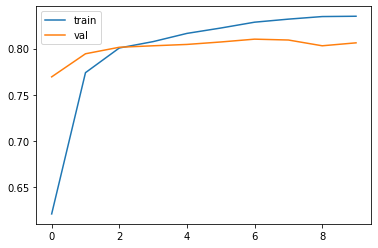

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [19]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

782/782 [==============================] - 8s 10ms/step - loss: 0.4311 - accuracy: 0.8028
Test accuracy : 0.8027600049972534


In [19]:
# Dropout, Batch Normalization 모델 안정화

# 합성곱 연산을 적용하는 2-D Conv

# 합성곱 연산을 적용하는 레이어를 여러개 만들어서 성능을 개선

# 2 - D Conv
def conv_ary() :
  
  conv_layer_ary = []
  inn = Input(shape=(300, 100 , 1))
  
  size = [2, 3, 4, 5]
  for s in size : 

    conv = Conv2D(filters= 100 , kernel_size=(s , 100) , strides=(1 , 1) , padding='valid') (inn) 
    act  = Activation('relu')(conv)
    pool = MaxPooling2D(pool_size= (300 - s + 1 , 1) ,padding='valid')(act) 

    conv_layer_ary.append(pool)

  out = concatenate(conv_layer_ary)
  model = Model(inputs = inn , outputs = out )

  return model


def improve_sentence_cnn_2d() :
    model = Sequential()

    model.add( Embedding(input_dim=3000 , output_dim=100 , input_length=300) )
    model.add( Reshape( (300, 100, 1), input_shape=(300, 100) ) )
    model.add( Dropout(0.5))

    model.add(conv_ary())

    model.add( Flatten() )

    model.add( Conv2D(filters=50, kernel_size =(5,100), strides=1, padding = 'valid') )
    model.add( MaxPooling2D())


    # classification
    model.add( Dense(10))
    model.add( BatchNormalization() )
    model.add( Activation('relu'))
    model.add( Dropout(0.3))
    
    model.add( Dense(10))
    model.add( BatchNormalization() )
    model.add( Activation('relu'))
    model.add( Dropout(0.3))

    # output
    model.add( Dense(1) )
    model.add( Activation('sigmoid'))

    # compile
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [20]:
model = improve_sentence_cnn_2d()
model.summary()

ValueError: ignored

In [ ]:
callbacks = [ EarlyStopping(monitor='val_accuracy', patience=3) ]
history = model.fit(X_train, y_train, batch_size= 50, validation_split=0.2, epochs=20, verbose=1, callbacks=callbacks)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])